#  Time Series Forecasting Project

## Problem Statement

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

## Importing Libraries

In [636]:
# Loading packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

## 1.1  Read the data

In [638]:
# read data
df = pd.read_csv("Sparkling.csv",parse_dates=True,index_col=0)
df = pd.DataFrame(df)

In [639]:
# Top rows
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [640]:
# Last  rows
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [641]:
# number of rows and columns
df.shape

(187, 1)

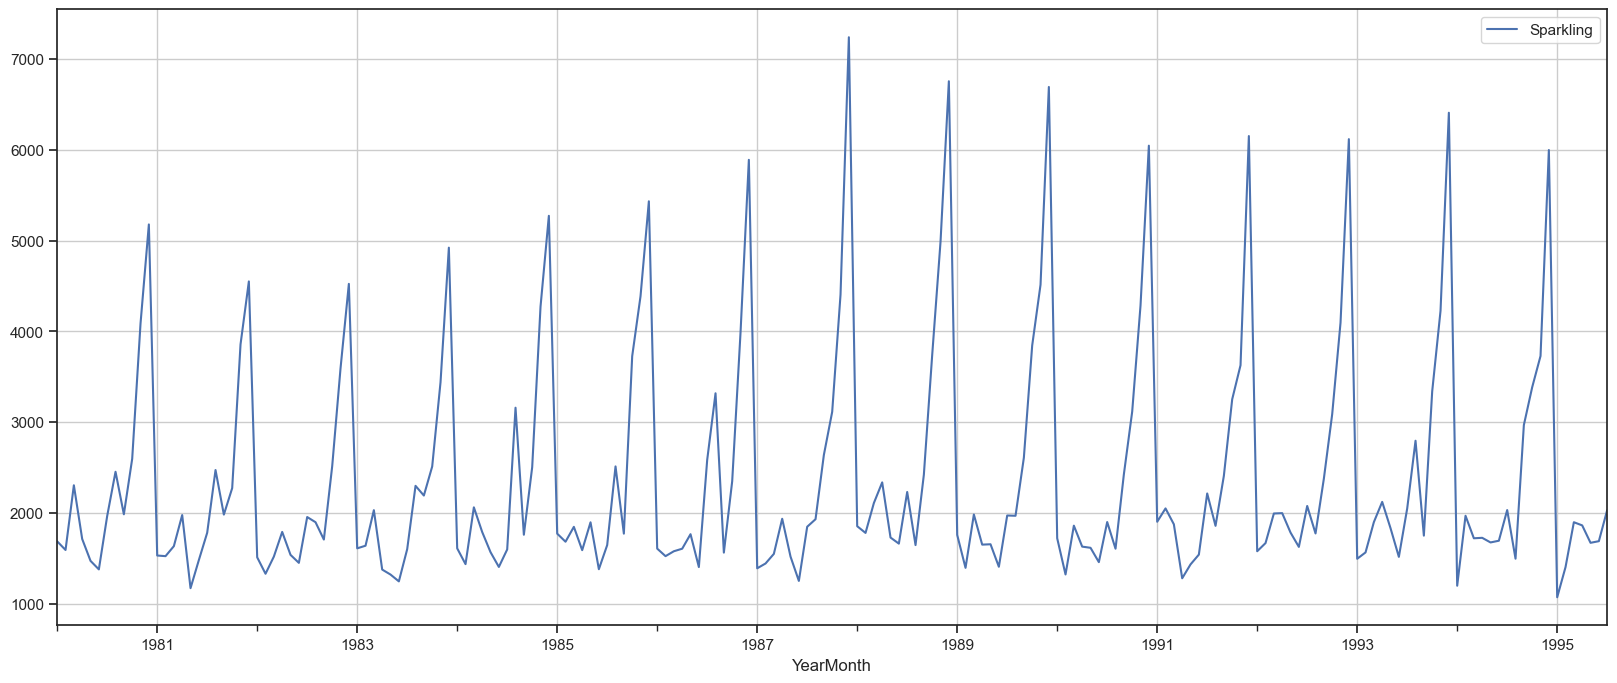

In [642]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [643]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [644]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [645]:
df.tail()

,Sales,Year,Month
YearMonth,,,
1995-03-01,1897,1995,3
1995-04-01,1862,1995,4
1995-05-01,1670,1995,5
1995-06-01,1688,1995,6
1995-07-01,2031,1995,7


In [646]:
# number of rows and columns
df.shape

(187, 3)

## 1.2 Exploratory Data Analysis to understand the data and also perform decomposition.

In [648]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int32
 2   Month   187 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 4.4 KB


In [649]:
# statistical summary
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Sales,187.0,2402.0,1295.0,1070.0,1605.0,1874.0,2549.0,7242.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


In [650]:
# isnull
df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

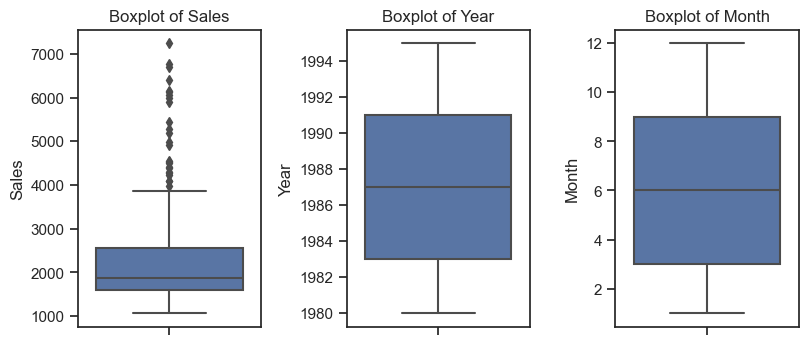

In [651]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sales

<Axes: xlabel='YearMonth'>

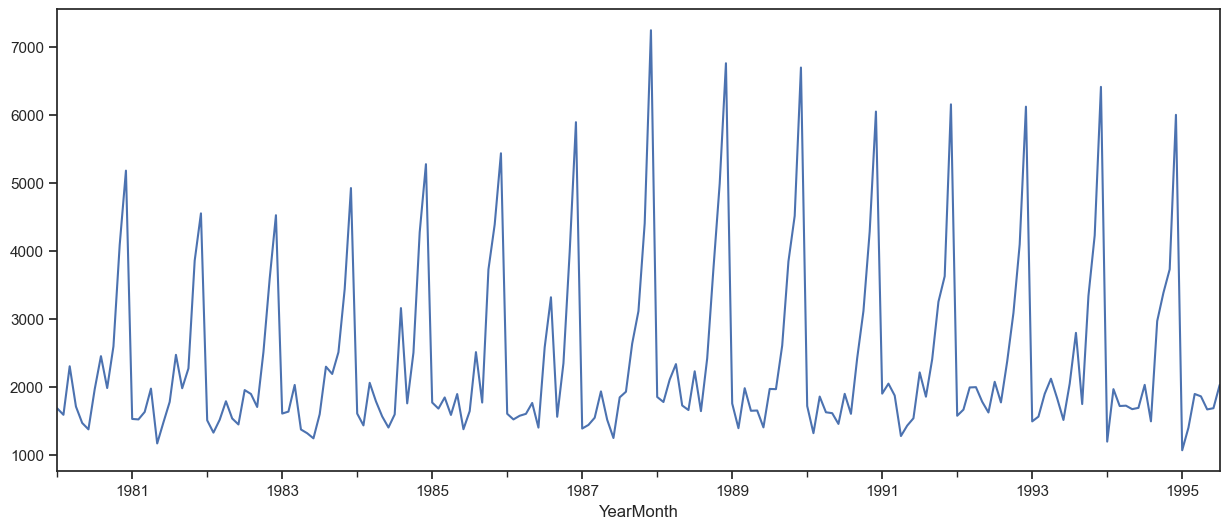

In [653]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

### Yearly Boxplot

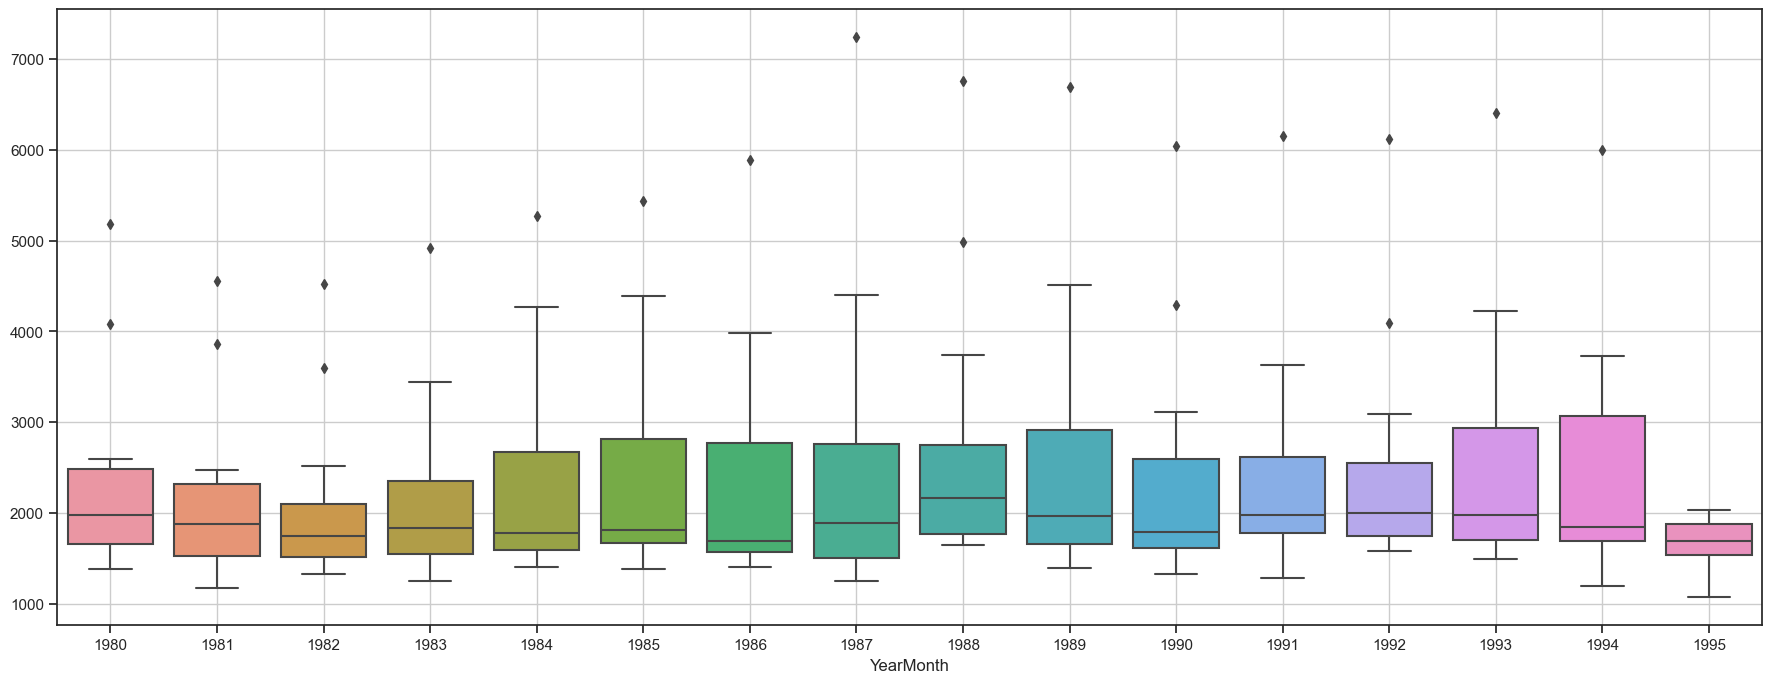

In [655]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

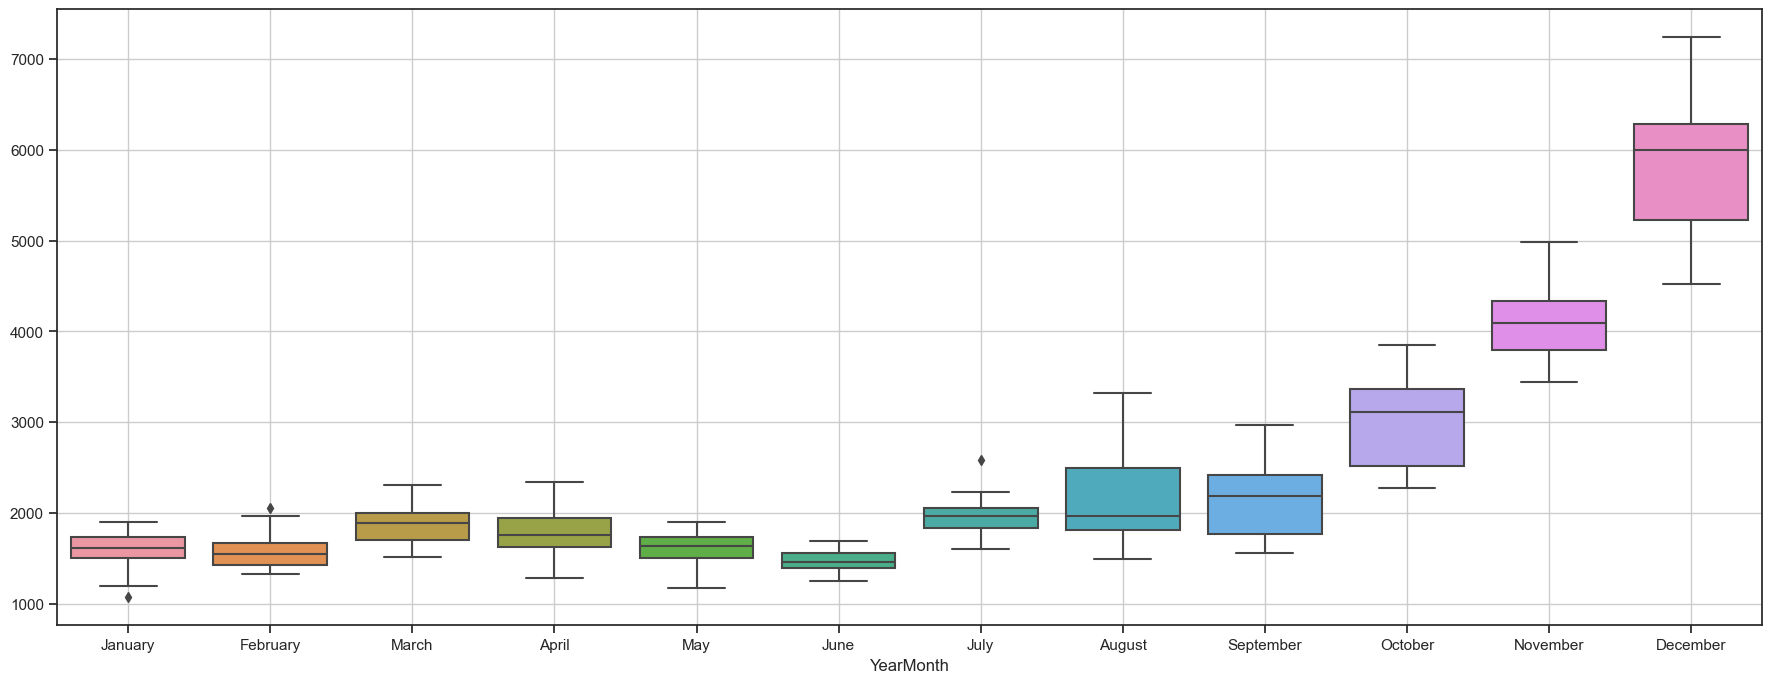

In [657]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Week Days Boxplot

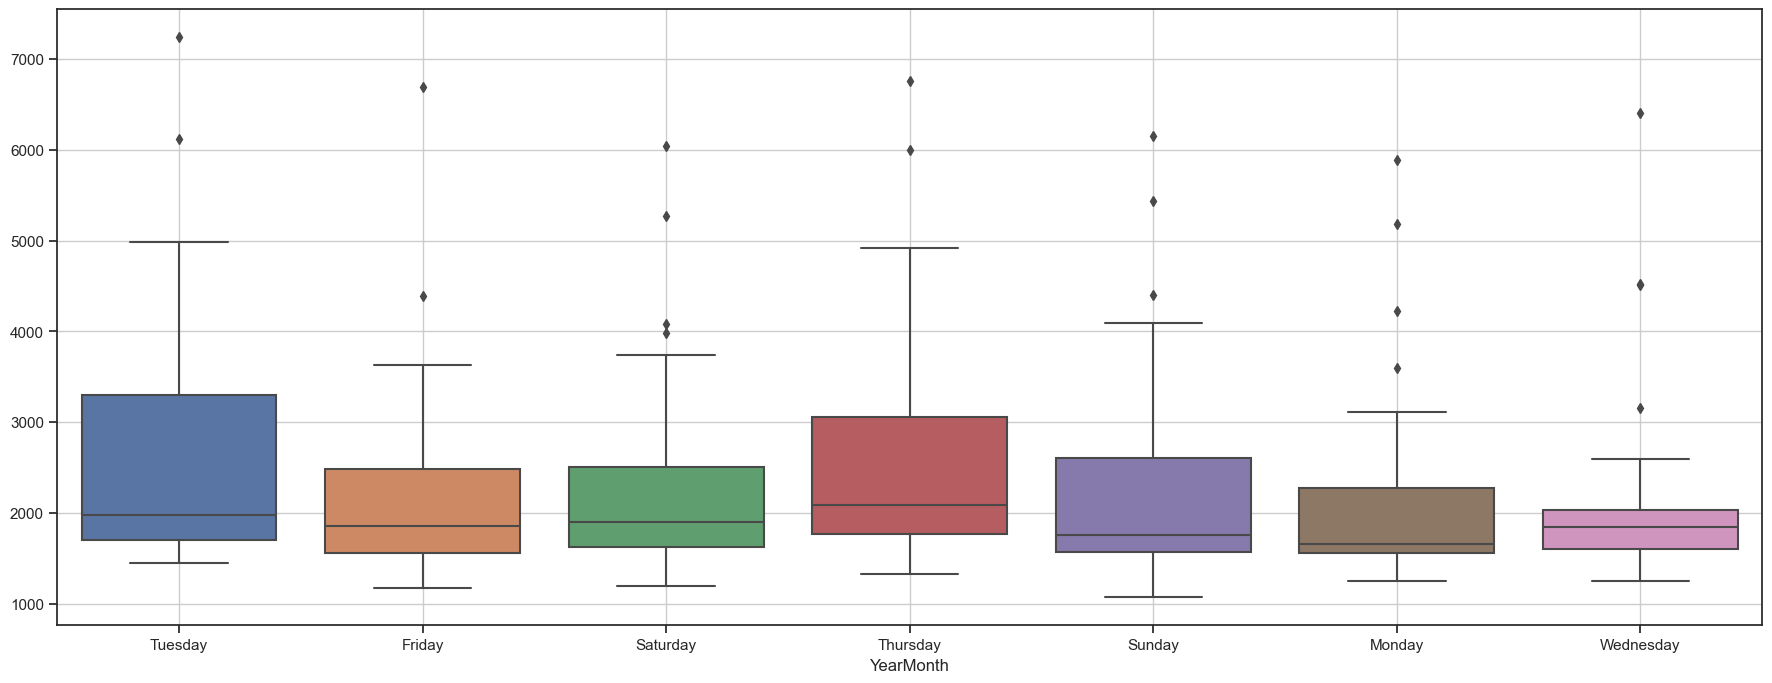

In [659]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Graph of monthly sales across years.

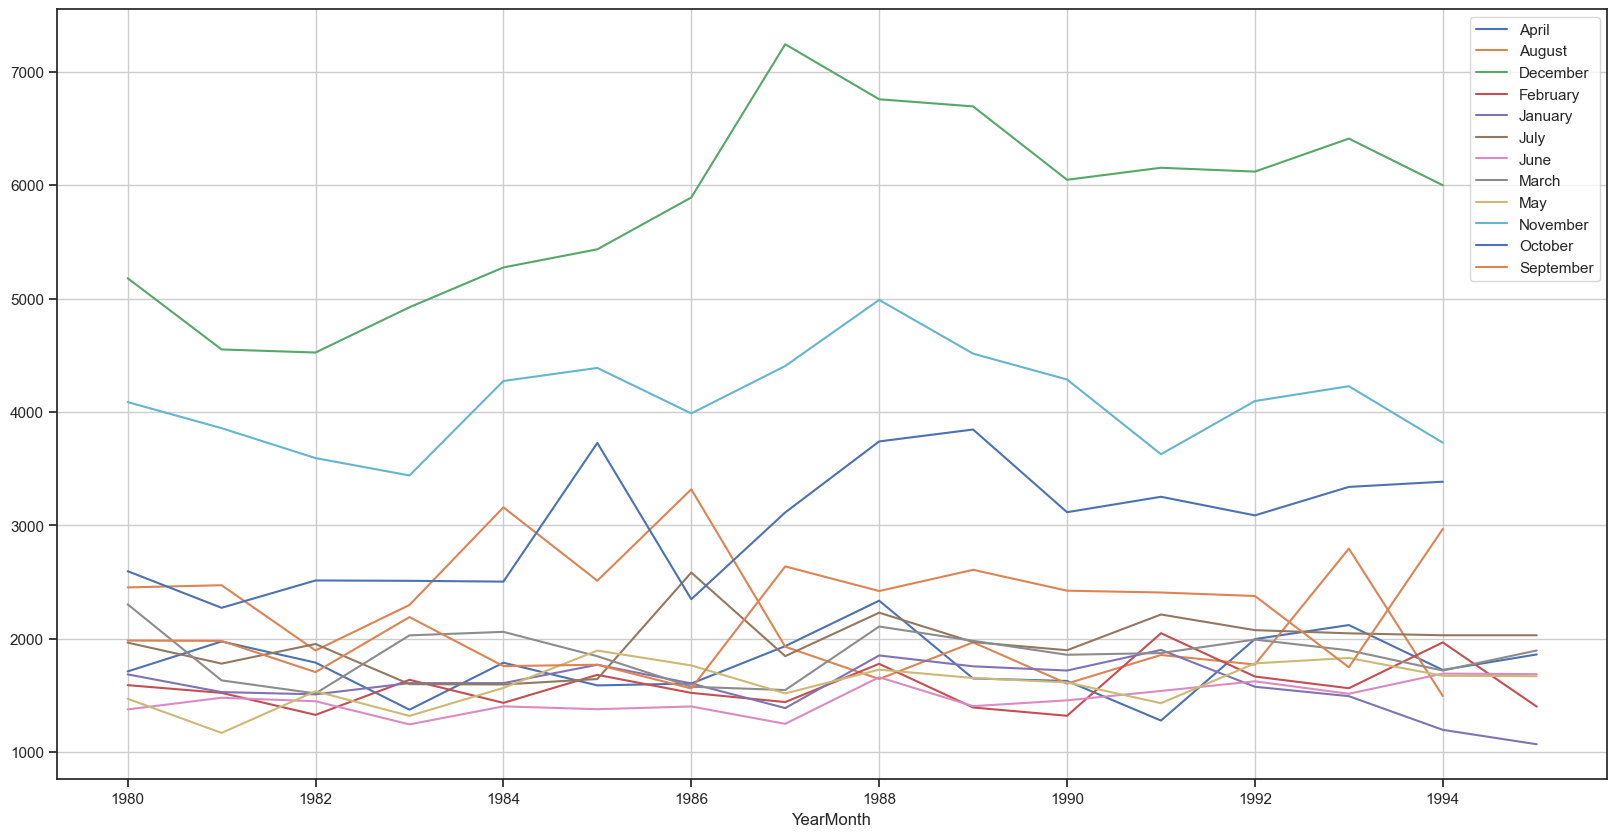

In [661]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Correlation plot

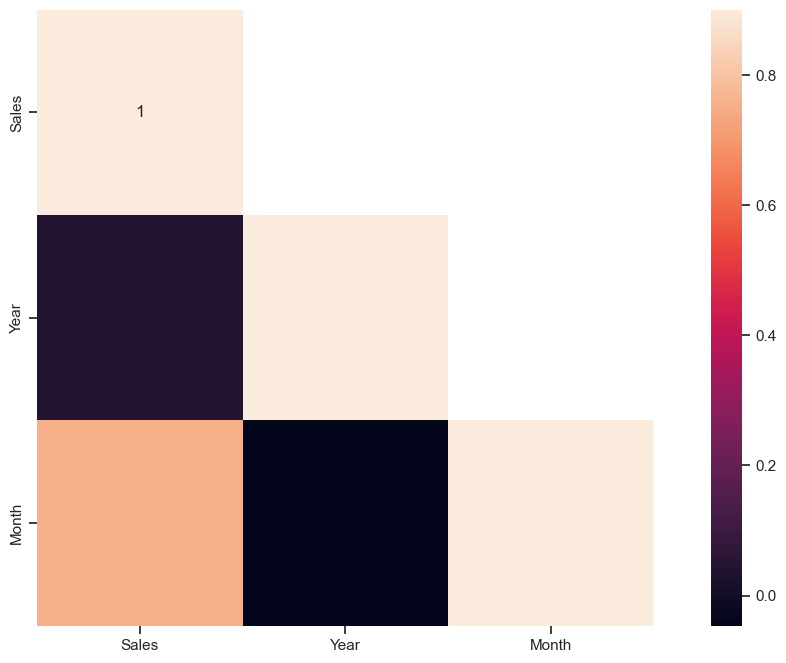

In [663]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

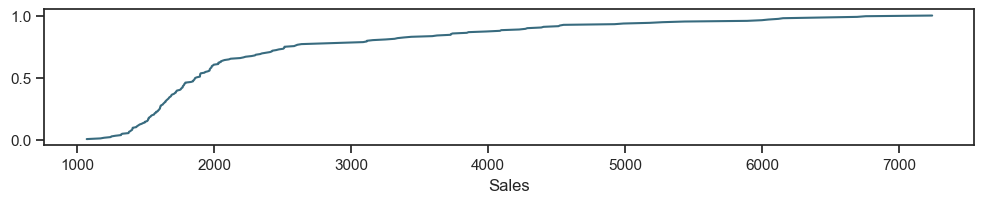

In [665]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition 

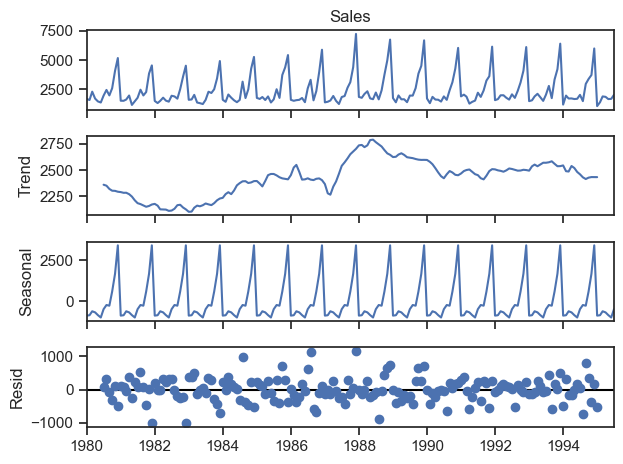

In [667]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [668]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


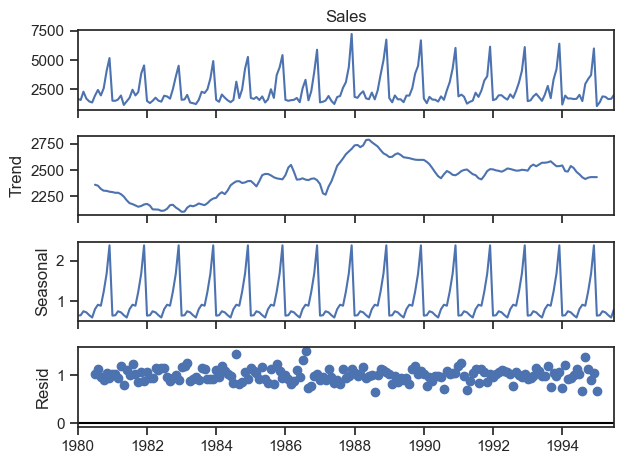

In [669]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [670]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## 1.3 Splitting the data into training and test. The test data starting in 1991.

In [672]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [673]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-0

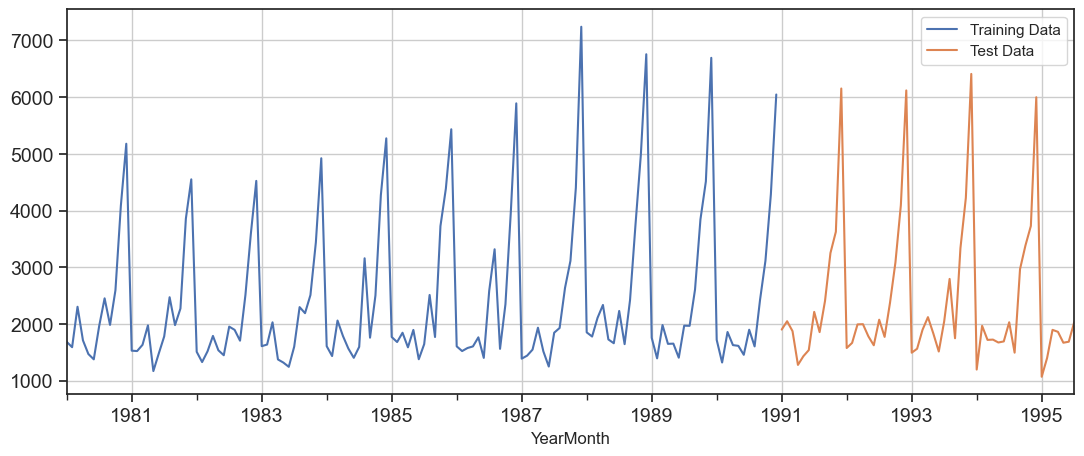

In [674]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Building all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression models and simple average models are also built on the training data and check the performance on the test data using RMSE.

- Model 1:Linear Regression 
- Model 2: Simple Average
- Model 3: Moving Average(MA)
- Model 4: Simple Exponential Smoothing
- Model 5: Double Exponential Smoothing (Holt's Model)
- Model 6: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression

In [678]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [679]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [680]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

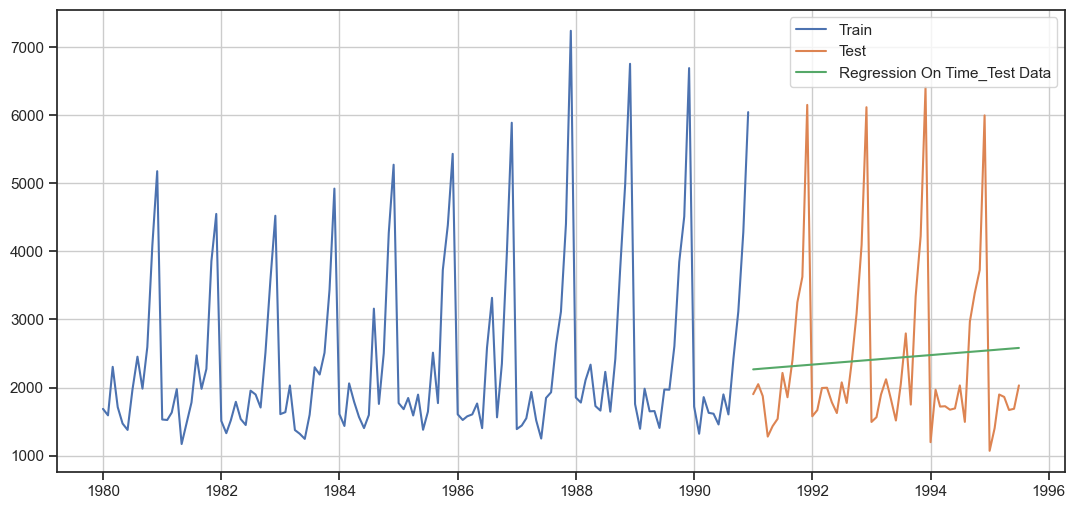

In [681]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [683]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,1275.867052


### Method 2: Simple Average

In [685]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [686]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,Year,Month,mean_forecast
YearMonth,,,,
1991-01-01,1902,1991,1,2403.780303
1991-02-01,2049,1991,2,2403.780303
1991-03-01,1874,1991,3,2403.780303
1991-04-01,1279,1991,4,2403.780303
1991-05-01,1432,1991,5,2403.780303


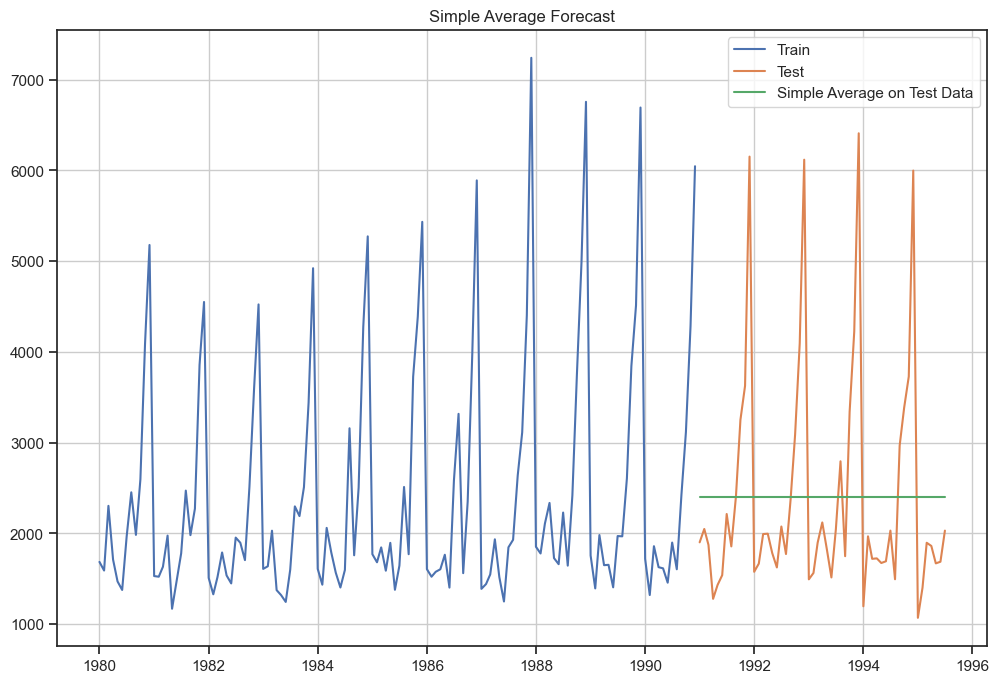

In [687]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [689]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804


### Method 3: Moving Average(MA)

In [691]:
MovingAverage = df.copy()
MovingAverage.head()

,Sales,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [692]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Sales,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN


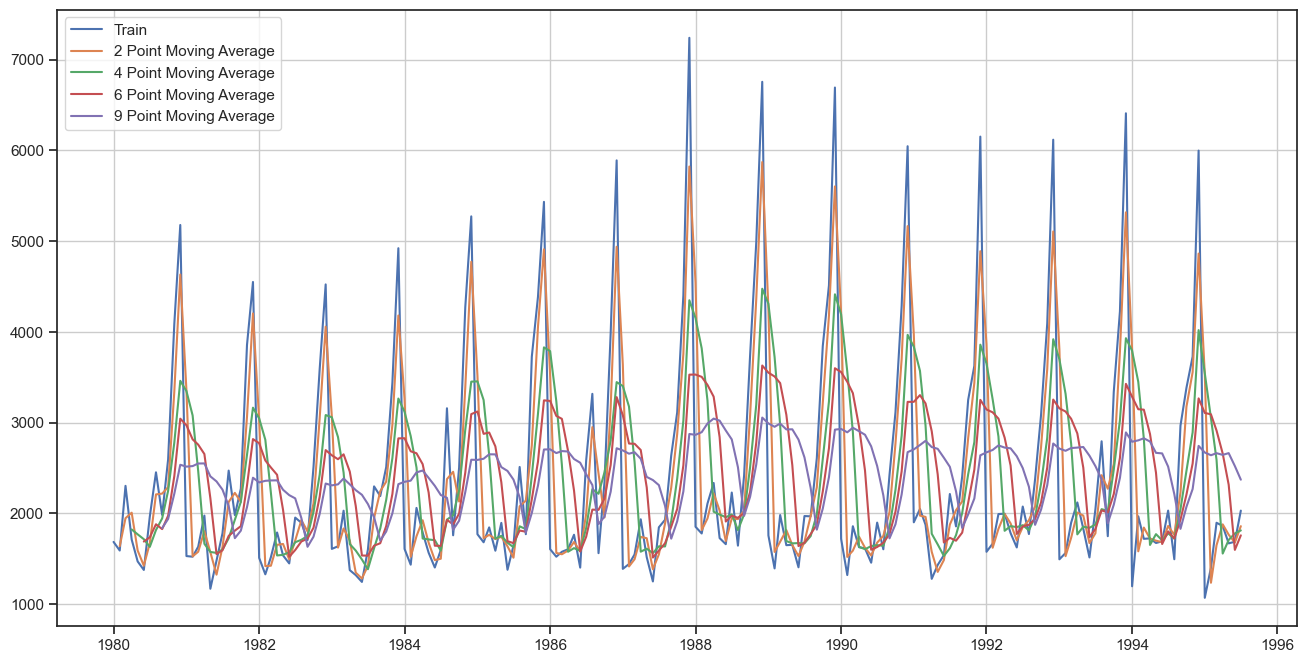

In [693]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [694]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


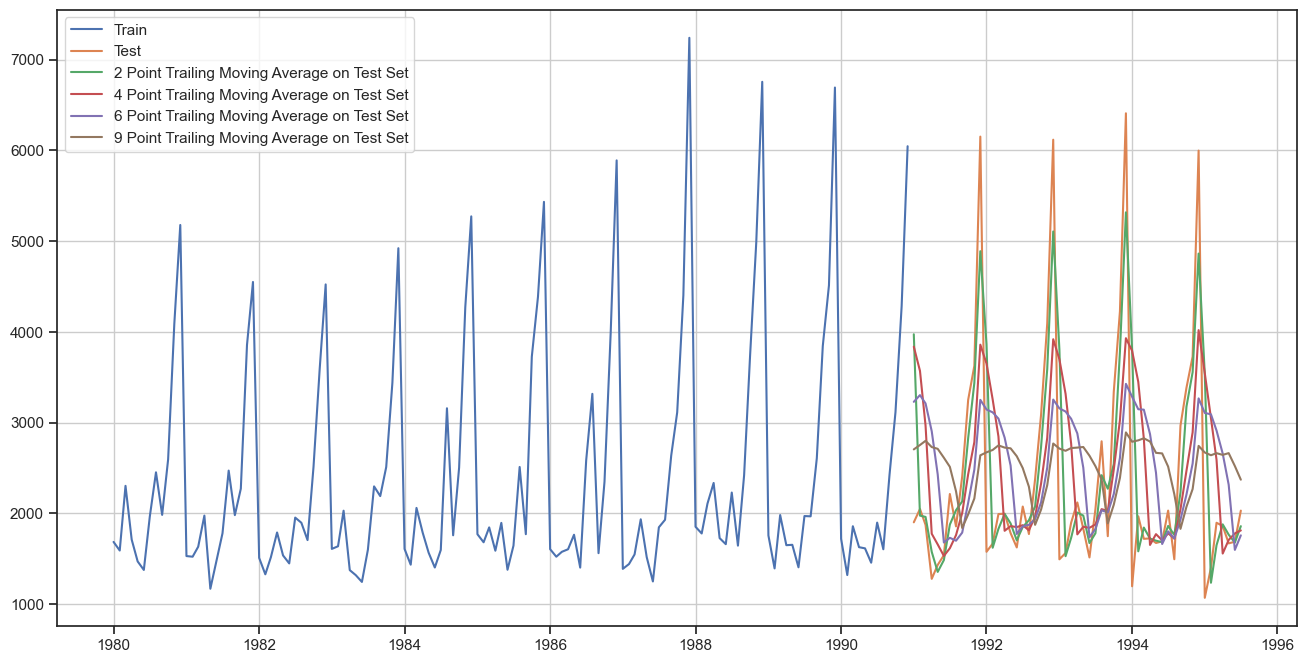

In [695]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [697]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [698]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


### Method 4: Simple Exponential Smoothing

In [700]:
SES_train = train.copy()
SES_test = test.copy()

In [701]:
SES_train = SES_train.asfreq('MS')
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [702]:
model_SES_autofit = model_SES.fit(optimized=True)

In [703]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [704]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [705]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sales,Year,Month,predict
YearMonth,,,,
1991-01-01,1902,1991,1,2676.676366
1991-02-01,2049,1991,2,2676.676366
1991-03-01,1874,1991,3,2676.676366
1991-04-01,1279,1991,4,2676.676366
1991-05-01,1432,1991,5,2676.676366


In [706]:
resultsDf_temp = pd.DataFrame({'Alpha Values': [], 'Train RMSE': [], 'Test RMSE': []})

for i in np.arange(0.1, 1, 0.1):
    # Fit the SES model with the specified alpha
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=False, use_brute=True)
    
    # Store the fitted and forecasted values
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    # Calculate RMSE for training and testing sets
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'], SES_train[f'predict_{i}'], squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'], SES_test[f'predict_{i}'], squared=False)
    
    # Append the results using pd.concat
    resultsDf_temp = pd.concat([
        resultsDf_temp,
        pd.DataFrame({'Alpha Values': [i], 'Train RMSE': [rmse_model5_train_i], 'Test RMSE': [rmse_model5_test_i]})
    ], ignore_index=True)

# Display the results
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


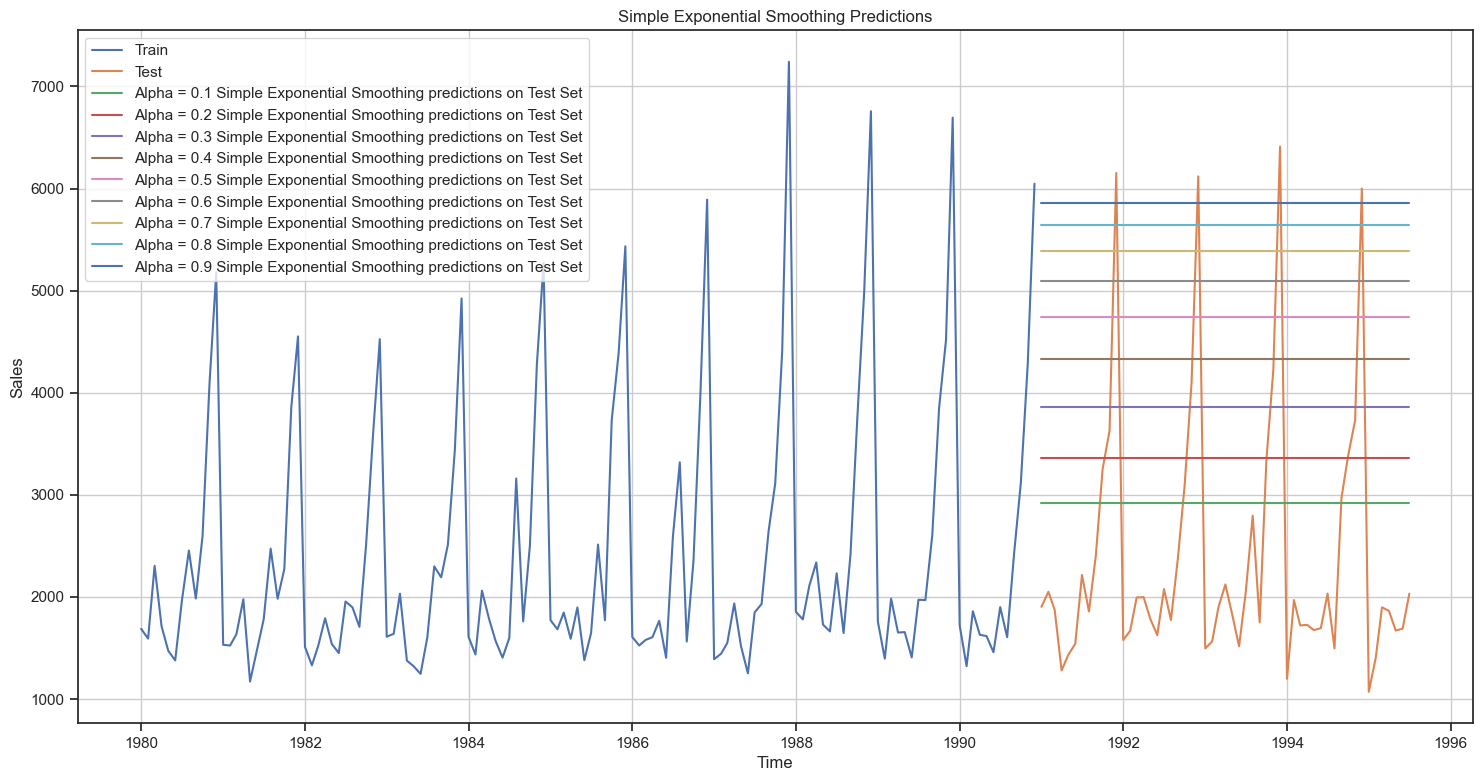

In [707]:
# Plot the actual training and testing sales data
plt.figure(figsize=(18, 9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

# Plot predictions for different alpha values
for i in np.arange(0.1, 1, 0.1):
    column_name = f'predict_{i}'  # Dynamically generated column name
    plt.plot(SES_test[column_name], label=f'Alpha = {i:.1f} Simple Exponential Smoothing predictions on Test Set')

# Add legend and grid for better readability
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Predictions')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid()
plt.show()

#### Model Evaluation

In [709]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


In [710]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


### Method 5: Double Exponential Smoothing (Holt's Model)

In [712]:
DES_train = train.copy()
DES_test = test.copy()

In [713]:
model_DES = Holt(DES_train['Sales'])

In [714]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [715]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sales,Year,Month,predict
YearMonth,,,,
1991-01-01,1902,1991,1,5221.278699
1991-02-01,2049,1991,2,5127.886554
1991-03-01,1874,1991,3,5034.494409
1991-04-01,1279,1991,4,4941.102264
1991-05-01,1432,1991,5,4847.710119


In [716]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [717]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [718]:
resultsDf_6 = pd.DataFrame({'Alpha Values': [], 'Beta Values': [], 'Train RMSE': [], 'Test RMSE': []})

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        # Fit the Double Exponential Smoothing model with specific alpha and beta
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=False, use_brute=True)
        
        # Generate dynamic column names for predictions
        train_col_name = f'predict_train_{i:.1f}_{j:.1f}'
        test_col_name = f'predict_test_{i:.1f}_{j:.1f}'
        
        # Store the fitted and forecasted values
        DES_train[train_col_name] = model_DES_alpha_i_j.fittedvalues
        DES_test[test_col_name] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Calculate RMSE for training and testing sets
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'], DES_train[train_col_name], squared=False)
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'], DES_test[test_col_name], squared=False)
        
        # Append results to the DataFrame using pd.concat
        resultsDf_6 = pd.concat([
            resultsDf_6,
            pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 
                          'Train RMSE': [rmse_model6_train], 
                          'Test RMSE': [rmse_model6_test]})
        ], ignore_index=True)

# Display the results
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
2,0.1,0.3,1445.762015,4293.084674
3,0.1,0.4,1480.897776,6039.537339
4,0.1,0.5,1521.108657,7390.522201
...,...,...,...,...
95,1.0,0.6,1753.402326,49327.087977
96,1.0,0.7,1825.187155,52655.765663
97,1.0,0.8,1902.013709,55442.273880
98,1.0,0.9,1985.368445,57823.177011


Index(['Sales', 'Year', 'Month', 'predict', 'predict_test_0.1_0.1',
       'predict_test_0.1_0.2', 'predict_test_0.1_0.3', 'predict_test_0.1_0.4',
       'predict_test_0.1_0.5', 'predict_test_0.1_0.6',
       ...
       'predict_test_1.0_0.1', 'predict_test_1.0_0.2', 'predict_test_1.0_0.3',
       'predict_test_1.0_0.4', 'predict_test_1.0_0.5', 'predict_test_1.0_0.6',
       'predict_test_1.0_0.7', 'predict_test_1.0_0.8', 'predict_test_1.0_0.9',
       'predict_test_1.0_1.0'],
      dtype='object', length=104)
            Sales  Year  Month      predict  predict_test_0.1_0.1  \
YearMonth                                                           
1991-01-01   1902  1991      1  5221.278699           2849.235097   
1991-02-01   2049  1991      2  5127.886554           2876.192175   
1991-03-01   1874  1991      3  5034.494409           2903.149252   
1991-04-01   1279  1991      4  4941.102264           2930.106330   
1991-05-01   1432  1991      5  4847.710119           2957.063408   



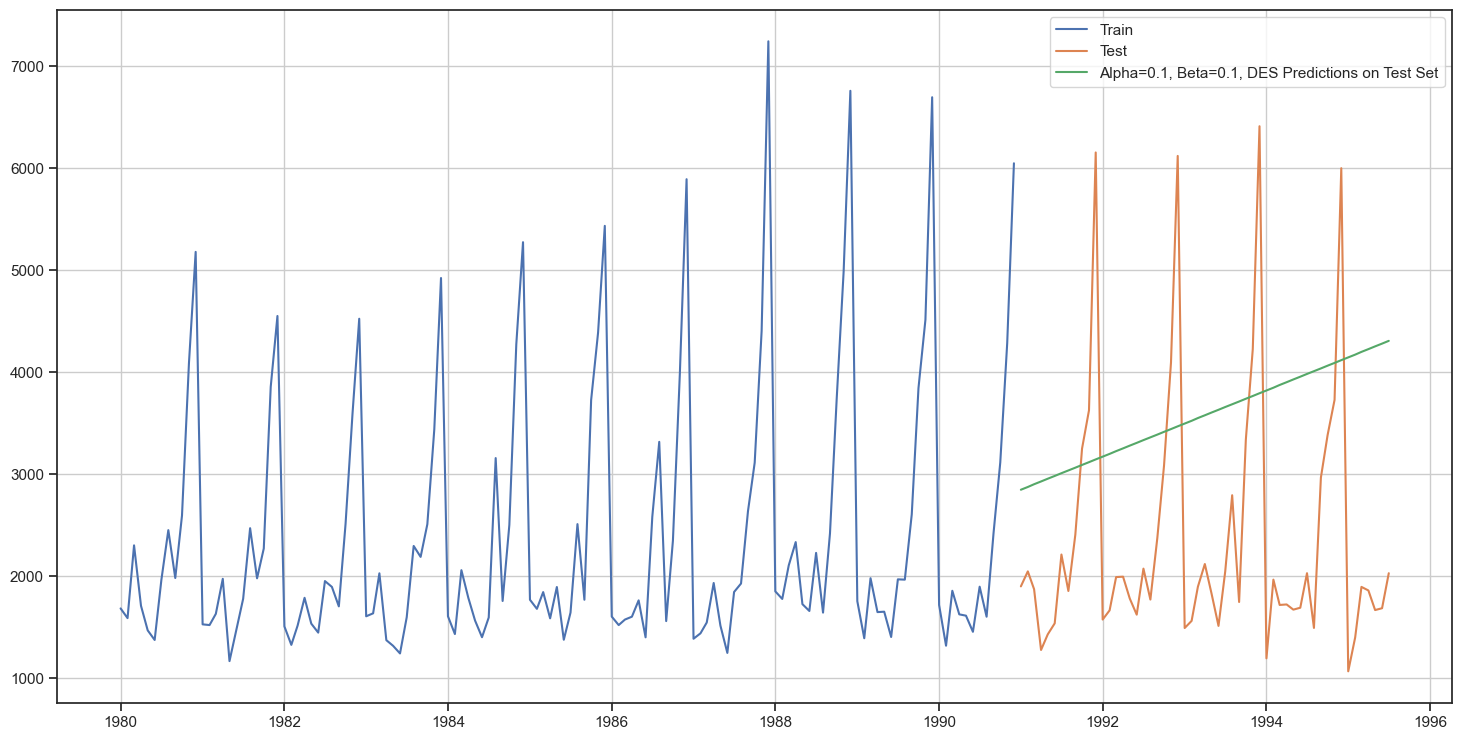

In [719]:
## Plotting on both the Training and Test data
print(DES_test.columns)
print(DES_test.head())

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Double Exponential Smoothing model
model_DES = ExponentialSmoothing(DES_train['Sales'], trend="add").fit(smoothing_level=0.1, smoothing_slope=0.1)

# Generate predictions for the test set
DES_test['predict_0.1_0.1'] = model_DES.forecast(steps=len(DES_test))


print(DES_test.columns)
import matplotlib.pyplot as plt

# Plot training, test, and predictions
plt.figure(figsize=(18, 9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')
plt.plot(DES_test['predict_0.1_0.1'], label='Alpha=0.1, Beta=0.1, DES Predictions on Test Set')

# Finalize the plot
plt.legend(loc='best')
plt.grid()
plt.show()


#### Model Evaluation

In [721]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


In [722]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670


### Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [724]:
TES_train = train.copy()
TES_test = test.copy()

In [725]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [726]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [727]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [728]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [729]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.10005373820823961,
 'smoothing_trend': 0.010034490652580457,
 'smoothing_seasonal': 0.5095957543425532,
 'damping_trend': nan,
 'initial_level': 2364.584774604334,
 'initial_trend': -0.016752880078245408,
 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
        -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
        -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [730]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [731]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107183603403979,
 'smoothing_trend': 0.049365284578820307,
 'smoothing_seasonal': 0.3621558008016758,
 'damping_trend': nan,
 'initial_level': 2356.54182683837,
 'initial_trend': 0.9987335327035919,
 'initial_seasons': array([0.73149822, 0.69744833, 0.89840537, 0.80865735, 0.66719269,
        0.6681085 , 0.87715674, 1.11429125, 0.9150789 , 1.18066449,
        1.84461049, 2.34299132]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [732]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11107142866032142,
 'smoothing_trend': 0.012341269861019839,
 'smoothing_seasonal': 0.4609259258337408,
 'damping_trend': nan,
 'initial_level': 2356.541666688765,
 'initial_trend': 1.003171553192385,
 'initial_seasons': array([-636.18663196, -722.94704863, -398.70746525, -473.40538195,
        -808.38454863, -815.31163196, -384.22829861,   72.94878474,
        -237.3949653 ,  272.33420139, 1541.2821181 , 2590.00086809]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [733]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa
YearMonth,,,,
1991-01-01,1902,1991,1,1509.969093
1991-02-01,2049,1991,2,1205.343244
1991-03-01,1874,1991,3,1702.386113
1991-04-01,1279,1991,4,1548.514691
1991-05-01,1432,1991,5,1467.824074


In [734]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm
YearMonth,,,,,
1991-01-01,1902,1991,1,1509.969093,1586.782642
1991-02-01,2049,1991,2,1205.343244,1355.896477
1991-03-01,1874,1991,3,1702.386113,1762.095344
1991-04-01,1279,1991,4,1548.514691,1655.471900
1991-05-01,1432,1991,5,1467.824074,1541.320914


In [735]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm
YearMonth,,,,,,
1991-01-01,1902,1991,1,1509.969093,1586.782642,1591.473305
1991-02-01,2049,1991,2,1205.343244,1355.896477,1360.492250
1991-03-01,1874,1991,3,1702.386113,1762.095344,1768.009110
1991-04-01,1279,1991,4,1548.514691,1655.471900,1661.678682
1991-05-01,1432,1991,5,1467.824074,1541.320914,1547.447439


In [736]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
YearMonth,,,,,,,
1991-01-01,1902,1991,1,1509.969093,1586.782642,1591.473305,1511.756579
1991-02-01,2049,1991,2,1205.343244,1355.896477,1360.492250,1227.680658
1991-03-01,1874,1991,3,1702.386113,1762.095344,1768.009110,1713.866726
1991-04-01,1279,1991,4,1548.514691,1655.471900,1661.678682,1578.252255
1991-05-01,1432,1991,5,1467.824074,1541.320914,1547.447439,1490.255624


In [737]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 379.696
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 406.510
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.386
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 354.454


In [738]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [739]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [740]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values': [], 'Beta Values': [], 'Gamma Values': [],
                              'Train RMSE': [], 'Test RMSE': [], 'Method': []})

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            # Fit the Triple Exponential Smoothing model
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            
            # Dynamic column names for predictions
            train_col_name = f'predict_ta_sa_train_{i:.1f}_{j:.1f}_{k:.1f}'
            test_col_name = f'predict_ta_sa_test_{i:.1f}_{j:.1f}_{k:.1f}'
            
            # Store the fitted and forecasted values
            TES_train[train_col_name] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[test_col_name] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            # Calculate RMSE for train and test
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[train_col_name], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], TES_test[test_col_name].replace([np.inf, np.nan], 0), squared=False
            )
            
            # Append results to the DataFrame using pd.concat
            resultsDf_7_2 = pd.concat([
                resultsDf_7_2,
                pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                              'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test],
                              'Method': ['ta_sa']})
            ], ignore_index=True)

# Display the results
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
0,0.1,0.1,0.1,4.289336e+02,5.070448e+02,ta_sa
1,0.1,0.1,0.2,4.009490e+02,6.380307e+02,ta_sa
2,0.1,0.1,0.3,3.856796e+02,7.430712e+02,ta_sa
3,0.1,0.1,0.4,3.789580e+02,8.079145e+02,ta_sa
4,0.1,0.1,0.5,3.781684e+02,8.409559e+02,ta_sa
...,...,...,...,...,...,...
995,1.0,1.0,0.6,1.417157e+04,4.624388e+05,ta_sa
996,1.0,1.0,0.7,6.992263e+04,2.250627e+06,ta_sa
997,1.0,1.0,0.8,3.008867e+05,7.323386e+06,ta_sa
998,1.0,1.0,0.9,1.096286e+06,2.612667e+07,ta_sa


In [741]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values': [], 'Beta Values': [], 'Gamma Values': [],
                              'Train RMSE': [], 'Test RMSE': [], 'Method': []})

for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            # Fit the Triple Exponential Smoothing model
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            
            # Dynamic column names for predictions
            train_col_name = f'predict_ta_sm_train_{i:.1f}_{j:.1f}_{k:.1f}'
            test_col_name = f'predict_ta_sm_test_{i:.1f}_{j:.1f}_{k:.1f}'
            
            # Store the fitted and forecasted values
            TES_train[train_col_name] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[test_col_name] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            # Calculate RMSE for train and test
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[train_col_name], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], TES_test[test_col_name].replace([np.inf, np.nan], 0), squared=False
            )
            
            # Append results using pd.concat
            resultsDf_7_2 = pd.concat([
                resultsDf_7_2,
                pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
                              'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test],
                              'Method': ['ta_sm']})
            ], ignore_index=True)

# Display the results
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
0,0.1,0.1,0.1,3.814397e+02,5.910387e+02,ta_sm
1,0.1,0.1,0.2,3.677929e+02,6.214407e+02,ta_sm
2,0.1,0.1,0.3,3.614334e+02,6.395595e+02,ta_sm
3,0.1,0.1,0.4,3.607002e+02,6.447910e+02,ta_sm
4,0.1,0.1,0.5,3.644451e+02,6.410980e+02,ta_sm
...,...,...,...,...,...,...
995,1.0,1.0,0.6,1.882994e+05,4.386054e+06,ta_sm
996,1.0,1.0,0.7,2.660015e+05,8.649577e+06,ta_sm
997,1.0,1.0,0.8,1.101923e+06,2.700435e+05,ta_sm
998,1.0,1.0,0.9,7.695708e+04,2.472201e+05,ta_sm


In [742]:
for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        for k in np.arange(0.1, 1.0, 0.1):
            # Fit the model with current parameters
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(
                smoothing_level=i,
                smoothing_slope=j,
                smoothing_seasonal=k,
                optimized=False,
                use_brute=True
            )

            # Store predictions
            TES_train[f'predict_tm_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_tm_sm_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            # Calculate RMSE for training and testing data
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'],
                TES_train[f'predict_tm_sm_{i}_{j}_{k}'],
                squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'],
                TES_test[f'predict_tm_sm_{i}_{j}_{k}'].replace(np.inf, 0).replace(np.nan, 0).dropna(),
                squared=False
            )

            # Create a DataFrame for the current result
            current_result = pd.DataFrame([{
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'tm_sm'
            }])

            # Concatenate the result
            resultsDf_7_2 = pd.concat([resultsDf_7_2, current_result], ignore_index=True)
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
0,0.1,0.1,0.1,3.814397e+02,5.910387e+02,ta_sm
1,0.1,0.1,0.2,3.677929e+02,6.214407e+02,ta_sm
2,0.1,0.1,0.3,3.614334e+02,6.395595e+02,ta_sm
3,0.1,0.1,0.4,3.607002e+02,6.447910e+02,ta_sm
4,0.1,0.1,0.5,3.644451e+02,6.410980e+02,ta_sm
...,...,...,...,...,...,...
1724,0.9,0.9,0.5,1.884707e+03,2.302948e+03,tm_sm
1725,0.9,0.9,0.6,1.348539e+04,3.103205e+24,tm_sm
1726,0.9,0.9,0.7,4.644174e+04,8.250337e+54,tm_sm
1727,0.9,0.9,0.8,2.408551e+09,2.026941e+151,tm_sm


In [743]:
# Initialize the results DataFrame
resultsDf_7_2 = pd.DataFrame({
    'Alpha Values': [],
    'Beta Values': [],
    'Gamma Values': [],
    'Train RMSE': [],
    'Test RMSE': [],
    'Method': []
})

for i in np.arange(0.1, 1.0, 0.1):  # Loop for smoothing level
    for j in np.arange(0.1, 1.0, 0.1):  # Loop for smoothing slope
        for k in np.arange(0.1, 1.0, 0.1):  # Loop for smoothing seasonal
            # Fit the Triple Exponential Smoothing model
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            
            # Generate column names dynamically for predictions
            train_col_name = f'predict_tm_sa_train_{i:.1f}_{j:.1f}_{k:.1f}'
            test_col_name = f'predict_tm_sa_test_{i:.1f}_{j:.1f}_{k:.1f}'
            
            # Store the fitted and forecasted values
            TES_train[train_col_name] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[test_col_name] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            # Calculate RMSE for train and test
            rmse_model7_train = metrics.mean_squared_error(
                TES_train['Sales'], TES_train[train_col_name], squared=False
            )
            rmse_model7_test = metrics.mean_squared_error(
                TES_test['Sales'], TES_test[test_col_name].replace([np.inf, np.nan], 0), squared=False
            )
            
            # Create a temporary DataFrame to hold the new results
            new_result = pd.DataFrame([{
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_train,
                'Test RMSE': rmse_model7_test,
                'Method': 'tm_sa'
            }])
            
            # Use pd.concat() to add the new result to the main results DataFrame
            resultsDf_7_2 = pd.concat([resultsDf_7_2, new_result], ignore_index=True)

# Display the results
print(resultsDf_7_2)

     Alpha Values  Beta Values  Gamma Values    Train RMSE      Test RMSE  \
0             0.1          0.1           0.1  4.299330e+02   4.646094e+02   
1             0.1          0.1           0.2  4.019163e+02   5.679937e+02   
2             0.1          0.1           0.3  3.866093e+02   6.548361e+02   
3             0.1          0.1           0.4  3.798584e+02   7.096843e+02   
4             0.1          0.1           0.5  3.790537e+02   7.386989e+02   
..            ...          ...           ...           ...            ...   
724           0.9          0.9           0.5  3.445069e+03   7.654216e+03   
725           0.9          0.9           0.6  6.687150e+04   3.661015e+07   
726           0.9          0.9           0.7  1.284128e+08   2.371203e+69   
727           0.9          0.9           0.8  1.733337e+12  1.059654e+150   
728           0.9          0.9           0.9  2.169427e+29            inf   

    Method  
0    tm_sa  
1    tm_sa  
2    tm_sa  
3    tm_sa  
4    tm_sa

In [744]:
TES_test.head()

,Sales,Year,Month,predict_ta_sa_test_0.1_0.1_0.1,predict_ta_sa_test_0.1_0.1_0.2,predict_ta_sa_test_0.1_0.1_0.3,predict_ta_sa_test_0.1_0.1_0.4,predict_ta_sa_test_0.1_0.1_0.5,predict_ta_sa_test_0.1_0.1_0.6,predict_ta_sa_test_0.1_0.1_0.7,...,predict_tm_sa_test_0.9_0.8_0.9,predict_tm_sa_test_0.9_0.9_0.1,predict_tm_sa_test_0.9_0.9_0.2,predict_tm_sa_test_0.9_0.9_0.3,predict_tm_sa_test_0.9_0.9_0.4,predict_tm_sa_test_0.9_0.9_0.5,predict_tm_sa_test_0.9_0.9_0.6,predict_tm_sa_test_0.9_0.9_0.7,predict_tm_sa_test_0.9_0.9_0.8,predict_tm_sa_test_0.9_0.9_0.9
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,1902,1991,1,1671.894991,1540.529588,1472.827405,1444.947521,1440.100315,1446.456719,1456.102126,...,-5.868610e+20,1681.548575,1003.861817,1011.116778,-268.622873,-1267.416405,140057.792035,2.837339e+09,8.271367e+14,-5.212074e+23
1991-02-01,2049,1991,2,1535.938082,1354.094081,1236.723426,1163.127303,1118.381068,1091.681321,1075.381082,...,-1.101754e+23,2493.688129,1469.309964,1145.238568,-2129.658709,-11966.222163,153448.955624,3.813138e+10,2.759949e+17,-2.662675e+26
1991-03-01,1874,1991,3,1882.992874,1728.658127,1644.294990,1605.772780,1593.658780,1593.602194,1595.700721,...,-4.674701e+24,3209.508652,2499.957287,2962.569457,592.617998,-14594.985341,132162.891870,5.093329e+11,9.097558e+19,-8.209961e+27
1991-04-01,1279,1991,4,1798.243923,1638.281580,1535.922824,1469.062420,1424.230588,1393.229741,1370.975056,...,-5.266723e+25,3046.434803,2171.122226,3050.550334,1923.737151,-785.194212,196998.771995,6.803179e+12,2.998699e+22,1.059273e+31
1991-05-01,1432,1991,5,1576.572747,1470.697707,1394.544409,1347.223962,1324.218679,1318.006765,1319.843928,...,-1.636152e+26,2755.658417,1623.114204,2612.626803,1438.598738,472.443999,236196.434585,9.087032e+13,9.884186e+24,5.889733e+33


#### Model Evaluation

In [746]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
244,0.4,0.1,0.2,439.987996,341.653525,tm_sa
27,0.1,0.4,0.1,456.943092,341.775908,tm_sa
81,0.2,0.1,0.1,443.203054,356.608073,tm_sa
90,0.2,0.2,0.1,457.975861,359.576823,tm_sa
18,0.1,0.3,0.1,446.580473,375.210305,tm_sa


In [747]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525


In [748]:
train_col_name = f'predict_tm_sm_train_{i:.1f}_{j:.1f}_{k:.1f}'
test_col_name = f'predict_tm_sm_test_{i:.1f}_{j:.1f}_{k:.1f}'


In [749]:
resultsDf_7_2 = pd.DataFrame({'Alpha Values': [], 'Beta Values': [], 'Gamma Values': [],
                              'Train RMSE': [], 'Test RMSE': [], 'Method': []})

for i in np.arange(0.1, 1.0, 0.1):
    for j in np.arange(0.1, 1.0, 0.1):
        for k in np.arange(0.1, 1.0, 0.1):
            # Fit the Triple Exponential Smoothing model
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(
                smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True
            )
            
            # Generate dynamic column names
            train_col_name = f'predict_tm_sm_train_{i:.1f}_{j:.1f}_{k:.1f}'
            test_col_name = f'predict_tm_sm_test_{i:.1f}_{j:.1f}_{k:.1f}'
            
            # Store predictions
            TES_train[train_col_name] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[test_col_name] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))


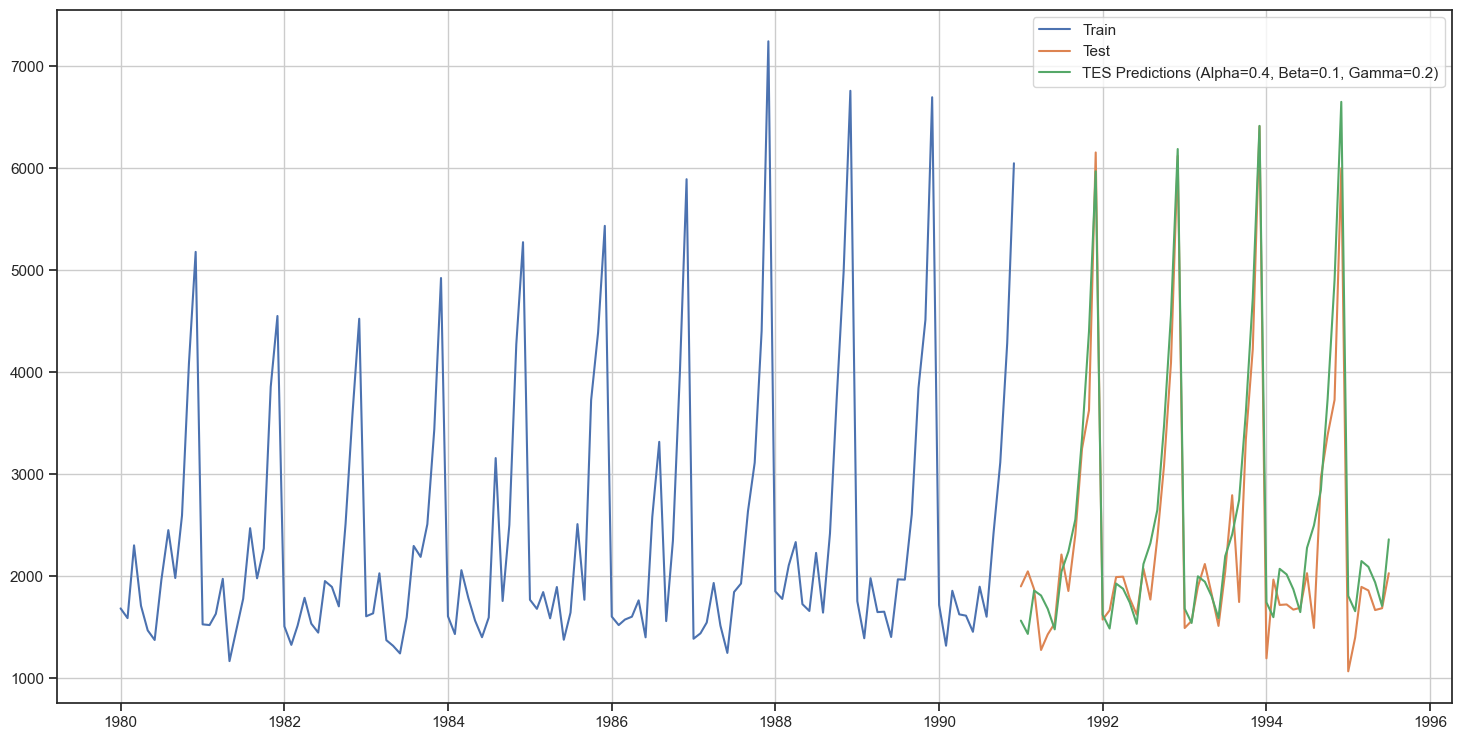

In [750]:
plt.figure(figsize=(18, 9))

# Plot actual training and test data
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

# Adjust for an existing prediction column
test_col_name = 'predict_tm_sm_test_0.4_0.1_0.2'  # Replace with an actual column name

if test_col_name in TES_test.columns:
    plt.plot(TES_test[test_col_name], label=f'TES Predictions (Alpha=0.4, Beta=0.1, Gamma=0.2)')
else:
    print(f"Prediction column '{test_col_name}' not found. Verify parameter combinations and column naming.")

# Add legend and grid
plt.legend(loc='best')
plt.grid()
plt.show()


## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Checking for stationarity of the whole Time Series data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- H0
 : The Time Series has a unit root and is thus non-stationary.
- H1
 : The Time Series does not have a unit root and is thus stationary.
 
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α
 value.
 
We see that at 5% significant level the Time Series is non-stationary.

In [754]:
from statsmodels.tsa.stattools import adfuller

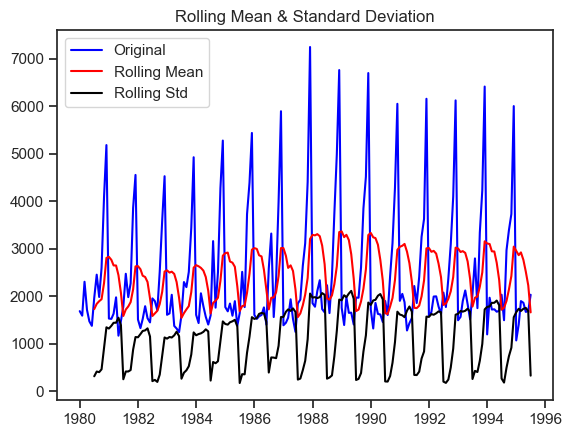

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [755]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

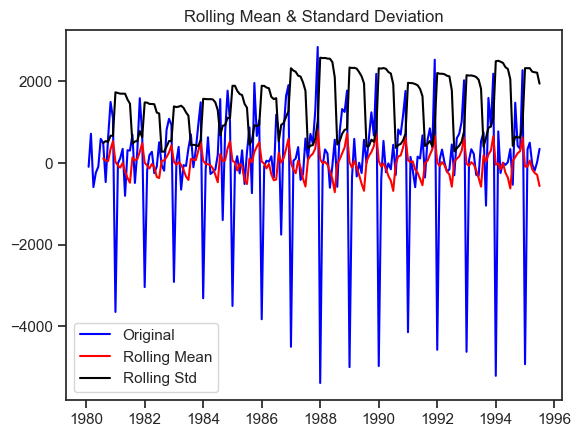

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [756]:
test_stationarity(df['Sales'].diff().dropna())

## 1.6 Building an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluated this model on the test data using RMSE.

### Auto - Arima Model 

In [759]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [760]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [761]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Create an empty DataFrame to store results
ARIMA_AIC = pd.DataFrame({'param': [], 'AIC': []})

# Iterate through the pdq combinations
for param in pdq:
    # Fit the ARIMA model
    ARIMA_model = ARIMA(train['Sales'].values, order=param).fit()
    
    # Print the AIC for the current model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    
    # Add the results to the DataFrame using pd.concat
    ARIMA_AIC = pd.concat([
        ARIMA_AIC,
        pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
    ], ignore_index=True)

# Display the results DataFrame
print(ARIMA_AIC)


ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231278064
ARIMA(0, 1, 3) - AIC:2233.9948577600953
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946736415
ARIMA(1, 1, 2) - AIC:2234.5272004521285
ARIMA(1, 1, 3) - AIC:2235.607812292888
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262364514
ARIMA(2, 1, 2) - AIC:2213.5092170036614
ARIMA(2, 1, 3) - AIC:2232.982762467654
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989865071907
ARIMA(3, 1, 2) - AIC:2230.792548127145
ARIMA(3, 1, 3) - AIC:2221.456643202785
        param          AIC
0   (0, 1, 0)  2267.663036
1   (0, 1, 1)  2263.060016
2   (0, 1, 2)  2234.408323
3   (0, 1, 3)  2233.994858
4   (1, 1, 0)  2266.608539
5   (1, 1, 1)  2235.755095
6   (1, 1, 2)  2234.527200
7   (1, 1, 3)  2235.607812
8   (2, 1, 0)  2260.365744
9   (2, 1, 1)  2233.777626
10  (2, 1, 2)  2213.509217
11  (2, 1, 3)  2232.982762
12  (3, 1, 0)  22

In [762]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509217
15,"(3, 1, 3)",2221.456643
14,"(3, 1, 2)",2230.792548
11,"(2, 1, 3)",2232.982762
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.498987
7,"(1, 1, 3)",2235.607812


In [763]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 08 Dec 2024   AIC                           2213.509
Time:                        16:23:36   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

### Predict on the Test Set using this model and evaluate the model.

In [765]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9796919669707


In [766]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525


## AUTO- SARIMA

In [768]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [769]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [770]:
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        # Define and fit the SARIMA model
        SARIMA_model = sm.tsa.statespace.SARIMAX(
            train['Sales'].values,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        
        # Fit the model
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        # Print the AIC for the current model
        print(f'SARIMA{param}x{param_seasonal} - AIC: {results_SARIMA.aic}')
        
        # Add the results to the DataFrame using pd.concat
        SARIMA_AIC = pd.concat([
            SARIMA_AIC,
            pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
        ], ignore_index=True)

# Display the results DataFrame
print(SARIMA_AIC)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 1956.261461684553
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 1723.1533640237444
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC: 3650.8176573058563
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 1806.9905301388658
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 1633.210873579196
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC: 6529.670846129748
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 1647.2054158620226
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 1630.9898053920824
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC: 3990.0122745013414
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC: 1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC: 1469.187105262566
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC: 1471.0594530065248
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC: 2858.5655791260538
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 1923.7688649566

In [771]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
83,"(1, 1, 1)","(0, 0, 3, 12)",12.000000
183,"(2, 1, 3)","(1, 0, 3, 12)",20.000000
215,"(3, 1, 1)","(1, 0, 3, 12)",208.047774
91,"(1, 1, 1)","(2, 0, 3, 12)",259.695513
251,"(3, 1, 3)","(2, 0, 3, 12)",349.867995


In [772]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 08 Dec 2024   AIC                           1555.584
Time:                                    16:33:28   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

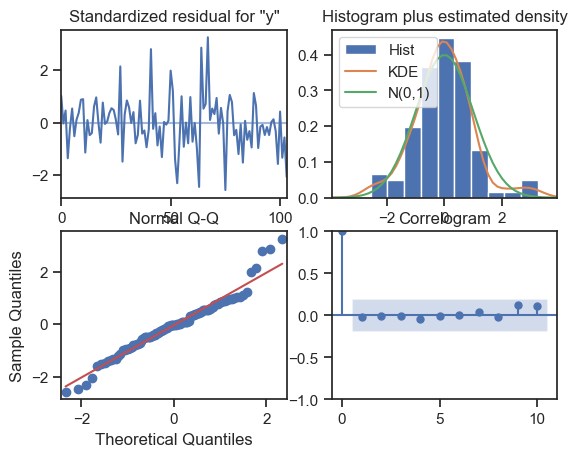

In [773]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [775]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.423280,388.343481,566.284043,2088.562516
1,1315.135052,402.005024,527.219682,2103.050421
2,1621.624915,401.998628,833.722083,2409.527747
3,1598.893456,407.235385,800.726769,2397.060143
4,1392.721059,407.965284,593.123795,2192.318324


In [776]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.5906080398619


In [777]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525


## 1.7 Building ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluating this model on the test data using RMSE.

#### Model 10 : Manual ARIMA

In [780]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

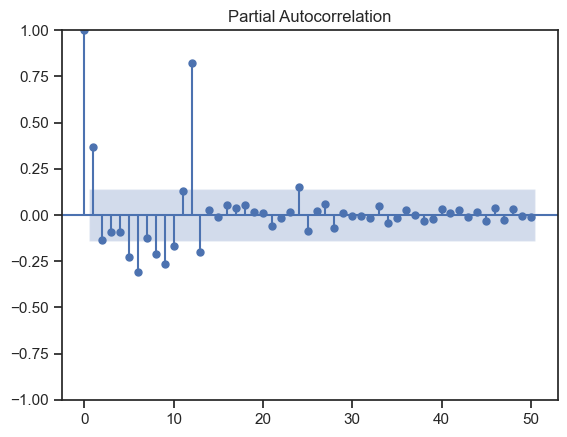

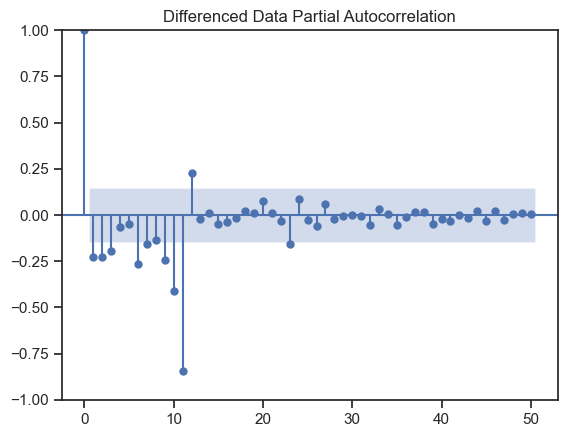

In [781]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

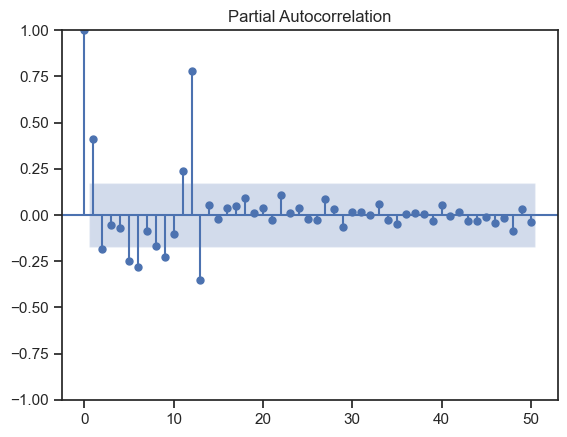

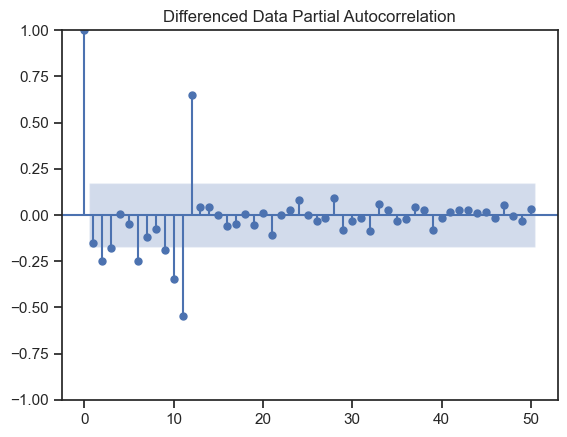

In [782]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [783]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 08 Dec 2024   AIC                           2235.755
Time:                        16:33:33   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

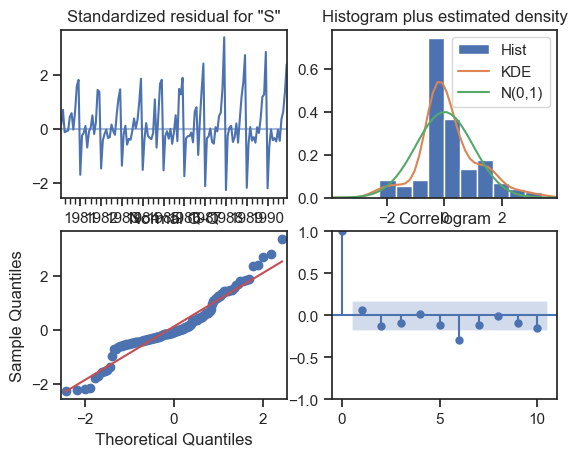

In [784]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation 

In [786]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367319145406


In [787]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525


#### Model 11 : Manual SARIMA

In [789]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [790]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sun, 08 Dec 2024   AIC                           1774.175
Time:                                    16:33:36   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [791]:
# Replace the append() method with pd.concat()
SARIMA_AIC = pd.concat([
    SARIMA_AIC,
    pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_manual_SARIMA.aic]})
], ignore_index=True)

# Display the updated DataFrame
print(SARIMA_AIC)


       param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347


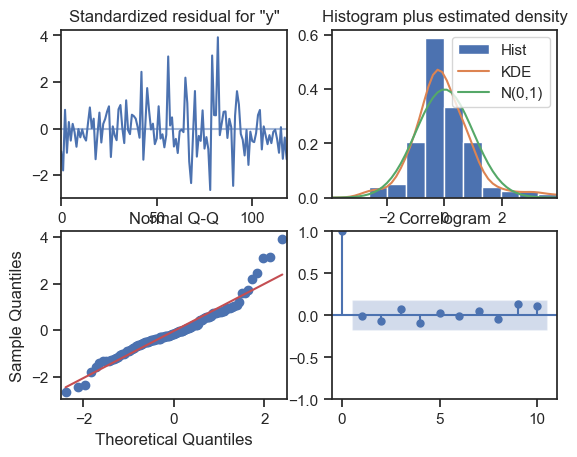

In [792]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [793]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1543.900070,388.532063,782.391219,2305.408921
1,1311.208248,400.994074,525.274305,2097.142192
2,1810.538054,403.246206,1020.190014,2600.886094
3,1650.451755,404.472611,857.700005,2443.203505
4,1561.609704,405.532750,766.780119,2356.439289


In [794]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61244937595353


In [795]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525


## 1.8 Building a table (creating a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [797]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",341.653525
"(1,1,1)(1,1,1,12),Manual_SARIMA",359.612449
"(1,1,1),(2,0,3,12),Auto_SARIMA",528.590608
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
Linear Regression,1275.867052
6pointTrailingMovingAverage,1283.927428
Auto_ARIMA,1299.979692
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


## 1.9 Based on the model-building, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals.

In [799]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [800]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [801]:
# Prediction
TES_train = df.copy()

In [802]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [803]:
future_predictions['Sales_Predictions']=prediction
future_predictions

,Sales_Predictions
1995-08-01,1988.782193
1995-09-01,2652.762887
1995-10-01,3483.872246
1995-11-01,4354.989747
1995-12-01,6900.103171
1996-01-01,1546.800546
1996-02-01,1981.361768
1996-03-01,2245.459724
1996-04-01,2151.066942
1996-05-01,1929.355815


In [804]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1213.490105,1988.782193,2764.074282
1995-09-01,1877.470798,2652.762887,3428.054975
1995-10-01,2708.580157,3483.872246,4259.164335
1995-11-01,3579.697659,4354.989747,5130.281836
1995-12-01,6124.811083,6900.103171,7675.395260


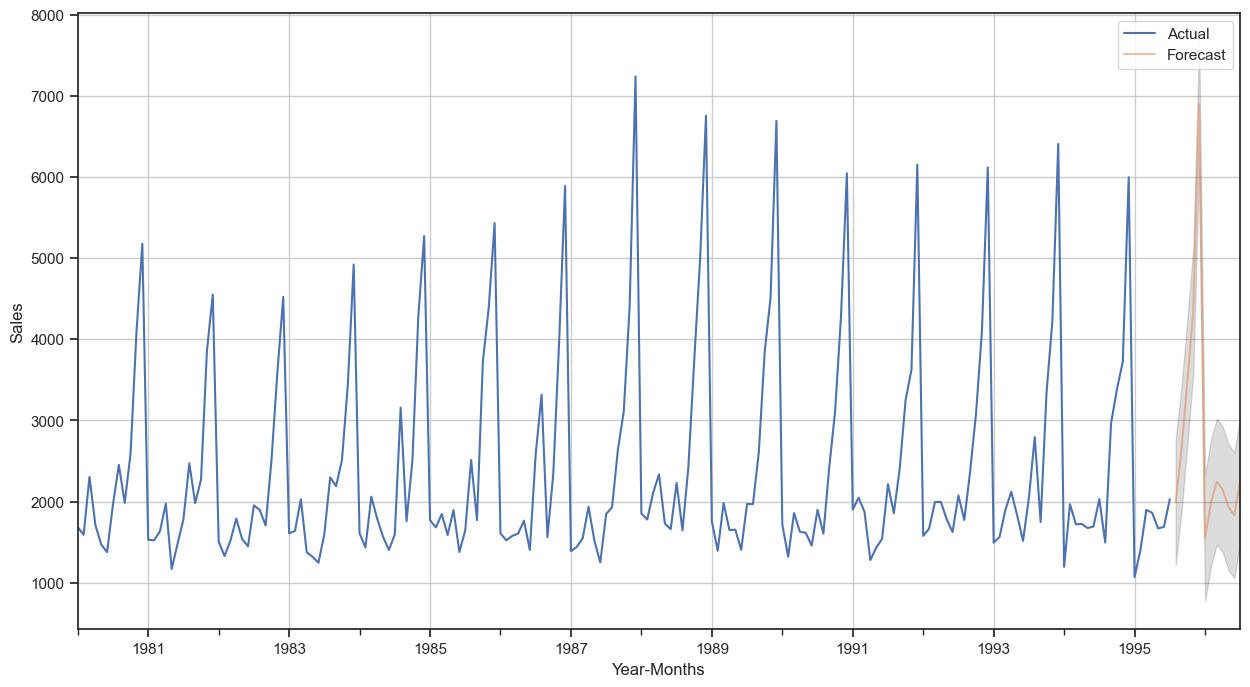

In [805]:
# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()